# Functions

In [11]:
import numpy as np
from scipy import linalg
import time
import matplotlib
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from time import sleep

In [25]:
from scipy.linalg import cossin
from scipy.linalg import expm
from scipy.special import comb
import matplotlib.pyplot as plt
import scipy
import random
from itertools import combinations
from scipy.stats import ortho_group

In [13]:
class Recursive_FM:
    def __init__(self, dimension1, dimension2, Vlist, length):
        self._k = dimension1
        self._n = dimension2
        self._Vlist = Vlist
        self._len = length
        
    def getTrans(self,k,n):
        A = np.eye(n)
        B = np.eye(n)
        for i in range(k):
            B[k+i,] = A[n-k+i,]
            B[n-k+i,] = A[k+i,]
        return B
    
    def csDecomp(self,S, k):
        u,cs,vdh = cossin(S, p = k, q = k, swap_sign = True)
        n = S.shape[0]
        T = self.getTrans(k,n)
        u = u@T
        cs = T@cs@T
        vdh = T@vdh
        return u,cs,vdh
        
    def geodesic(self,X,Y,t):
        U,CS,VDH = self.csDecomp(X.T.dot(Y), self._k)
        Theta = np.diag(np.arccos(np.diag(CS[:self._k,:self._k])))
        UU = U[:self._k, :self._k]
        VV = U[self._k:,self._k:]
        B = -2*UU@np.block([Theta, np.zeros((self._k, self._n - 2*self._k))])@VV.T
        Z = X@expm(t/2*np.block([[np.zeros((self._k,self._k)),-B],[B.T,np.zeros((self._n-self._k,self._n-self._k))]]))
        return Z
       
    def iFM(self):
        mean = self._Vlist[0]
        for i in range(self._len - 1):
            mean = self.geodesic(mean, self._Vlist[i+1], 1/(i+2))
        return mean

# Simulations 

Below are two distribution on $O(n)$

In [14]:
def Haar(dimension):
    a = np.random.randn(dimension,dimension)
    q, r = linalg.qr(a)
    q = q @ np.diag(np.sign(np.diag(r)))
    return q     

# ## Built-in function for Haar distribution on O(n)
# from scipy.stats import ortho_group
# x = ortho_group.rvs(3)

def log_normal(dimension, mu, sigma):
    assert(np.linalg.norm(mu@mu.T - np.eye(n)) < 1e-5)
    v = sigma/np.sqrt(2) * np.random.standard_normal(size = (dimension,dimension))
    Z = (v - v.T)/2
    return mu@scipy.linalg.expm(Z)

## On Haar distribution

Functions that are needed

In [15]:
def Est(k,n,m):
    Vlist = []
    for i in range(m):
        V0 = Haar(n)
        Vlist.append(V0)
    
    result = Recursive_FM(k,n,Vlist,m)
    return result.iFM()

def getTrans(k,n):
    A = np.eye(n)
    B = np.eye(n)
    for i in range(k):
        B[k+i,] = A[n-k+i,]
        B[n-k+i,] = A[k+i,]
    return B


def csDecomp(S, k):
    u,cs,vdh = cossin(S, p = k, q = k, swap_sign = True)
    n = S.shape[0]
    T = getTrans(k,n)
    u = u@T
    cs = T@cs@T
    vdh = T@vdh
    return u,cs,vdh

def geodesicDistance(X,Y,k):
    u,cs,vdh = csDecomp(X.T.dot(Y),k)
    return np.linalg.norm(np.arccos(np.diag(cs[:k,:k])))

Parameters setup

In [16]:
k = 2
n = 9
m = 100

# Vlist = []
# Qlist = []

I_ = np.block([[np.eye(k), np.zeros((k, n-k))],
                       [np.zeros((n-k, k)),-np.eye(n-k)]])
I = np.eye(n)

# for i in range(m):
#     V0 = random_orthogonal(n)
#     Vlist.append(V0)
#     Q0 = V0.dot(I_).dot(V0.T)
#     Qlist.append(Q0)

# result = Recursive_FM(k,n,Vlist,m)
# AA = result.iFM()

Case 1 

x1 = [100,200,500,1000,2000,5000]
y1 = [0,0,0,0,0,0]

for j in range(6):
    ds = Est(k,n,x1[j])
    y1[j] = geodesicDistance(I, ds, k)
    
print(x1)
print(y1)
plt.plot(x1,y1)
plt.show()

Case 2

x = np.arange(100,10000,100)
y = np.zeros_like(x,dtype=float)
for j in range(x.shape[0]):
    ds = Est(k,n,x[j])
    y[j] = geodesicDistance(I, ds, k)
    
print(x)
print(y)

plt.plot(x,y)
plt.show()

Case 3 

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

[ 100  200  500  800 1000 2000 3500 5000]
[1.65633565 1.64867881 1.6487843  1.65979476 1.64849907 1.65162363
 1.65160044 1.66076002]


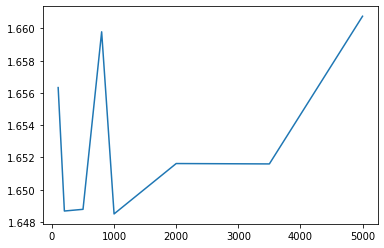

In [8]:
x1 = np.array([100,200,500,800,1000,2000,3500,5000])
y1 = np.zeros_like(x1,dtype=float)

for j in range(x1.shape[0]):
    z1 = np.zeros(1000, dtype = float)
    for i in tqdm(range(1000)):
        ds = Est(k,n,x1[j])
        z1[i] = geodesicDistance(I, ds, k)
    y1[j] = np.mean(z1)
    
print(x1)
print(y1)
plt.plot(x1,y1)
plt.show()

## On log-normal distribution 

Samples generation function

In [8]:
def Est_ln(k,n,m,mu,sigma):
    Vlist = []
    for i in range(m):
        V0 = log_normal(n, mu, sigma)
        Vlist.append(V0)
    
    result = Recursive_FM(k,n,Vlist,m)
    return result.iFM()

Parameter Setup

In [8]:
k = 2
n = 9
mu = np.eye(n)
sigma = 1.0

Case 1 

x1 = [100,200,500,1000,2000,5000]
y1 = [0,0,0,0,0,0]

for j in range(6):
    ds = Est_ln(k,n,x1[j],mu,sigma)
    y1[j] = geodesicDistance(I, ds, k)
    
print(x1)
print(y1)
plt.plot(x1,y1)
plt.show()

Case 2

x = np.arange(100,10000,100)
y = np.zeros_like(x,dtype=float)
for j in range(x.shape[0]):
    ds = Est_ln(k,n,x[j], mu, sigma)
    y[j] = geodesicDistance(I, ds, k)
    
print(x)
print(y)

plt.plot(x,y)
plt.show()

Case 3 

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

[ 100  200  500  800 1000 2000 3500 5000]
[1.325717   1.29035731 1.19440946 1.13872498 1.13719517 1.09460504
 1.04036882 1.01911698]


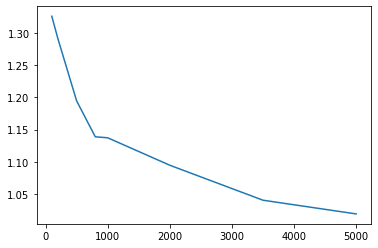

In [11]:
x1 = np.array([100,200,500,800,1000,2000,3500,5000])
y1 = np.zeros_like(x1,dtype=float)

for j in range(x1.shape[0]):
    z1 = np.zeros(1000, dtype = float)
    for i in tqdm(range(1000)):
        ds = Est_ln(k,n,x1[j],mu, sigma)
        z1[i] = geodesicDistance(I, ds, k)
    y1[j] = np.mean(z1)
    
print(x1)
print(y1)
plt.plot(x1,y1)
plt.show()

Extremee Case 

x = np.arange(100,20000,100)
y = np.zeros_like(x,dtype=float)
for j in range(x.shape[0]):
    ds = Est_ln(k,n,x[j], mu, sigma)
    y[j] = geodesicDistance(I, ds, k)
    
print(x)
print(y)

plt.plot(x,y)
plt.show()

Ordering matters!!!

In [12]:
k = 2
n = 9
m = 10000

Vlist = []
for i in range(m):
    V0 = Haar(n)
    Vlist.append(V0)

V1 = Vlist.copy()
result = Recursive_FM(k,n,V1,m)   
random.shuffle(Vlist)
V2 = Vlist.copy()
result2 = Recursive_FM(k,n,V2,m)
a1 = result.iFM()
a2 = result2.iFM()

print(a1)
print('\n')
print(a2)
print('\n')
print(geodesicDistance(a1, a2, k))

[[ 0.42572538  0.28017504 -0.08953948 -0.25428546  0.21856909  0.47602587
  -0.37610724 -0.28095029  0.41571462]
 [ 0.45645878  0.2060428  -0.00273859  0.24379068 -0.45346856 -0.35173929
   0.23790939 -0.55053481  0.02658269]
 [-0.33551113  0.13048208  0.63721037  0.07871727  0.00154814 -0.28034885
  -0.55395429 -0.25496441  0.08776768]
 [-0.26382607 -0.09575009  0.39562212 -0.14386476 -0.38201681  0.39410532
   0.46274448 -0.03438763  0.47690984]
 [ 0.06862799  0.55610425  0.16187933 -0.65472261  0.03701637 -0.33340007
   0.22422581  0.25001721 -0.07655076]
 [-0.08050841  0.36736256 -0.25597369  0.21334266 -0.60543104  0.06620828
  -0.35903237  0.47490406  0.14885273]
 [-0.54555239  0.04969318 -0.4788403  -0.37124072 -0.20629045  0.05048269
  -0.083199   -0.50219274 -0.16903137]
 [ 0.2494347  -0.10387039  0.32250433 -0.19273319 -0.33932643  0.42385777
  -0.15169443 -0.00890466 -0.68406857]
 [ 0.23915452 -0.62879966 -0.06630797 -0.4470671  -0.27393331 -0.3435423
  -0.26801106  0.107096

## Replicate

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

[ 100  200  500  800 1000 2000 3500 5000]
[1.64848103 1.65900401 1.65957564 1.65929413 1.66050472 1.64902492
 1.65237526 1.65805085]


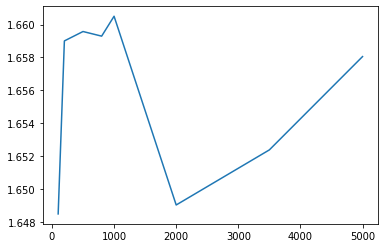

In [33]:
x1 = np.array([100,200,500,800,1000,2000,3500,5000])
y1 = np.zeros_like(x1,dtype=float)

for j in range(x1.shape[0]):
    z1 = np.zeros(1000, dtype = float)
    for i in tqdm(range(1000)):
        ds = Est(k,n,x1[j])
        z1[i] = geodesicDistance(I, ds, k)
    y1[j] = np.mean(z1)
    
print(x1)
print(y1)
plt.plot(x1,y1)
plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

[ 100  200  500  800 1000 2000 3500 5000]
[1.33347678 1.27411599 1.21397942 1.16491236 1.14217529 1.08769442
 1.03642659 1.00331359]


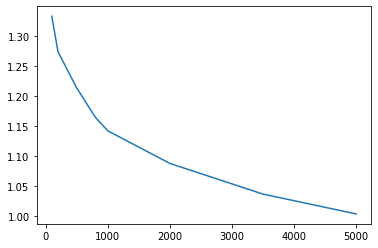

In [35]:
x1 = np.array([100,200,500,800,1000,2000,3500,5000])
y1 = np.zeros_like(x1,dtype=float)

for j in range(x1.shape[0]):
    z1 = np.zeros(1000, dtype = float)
    for i in tqdm(range(1000)):
        ds = Est_ln(k,n,x1[j],mu, sigma)
        z1[i] = geodesicDistance(I, ds, k)
    y1[j] = np.mean(z1)
    
print(x1)
print(y1)
plt.plot(x1,y1)
plt.show()

## Rivised simulation on Haar distribution 

In [16]:
from scipy.stats import ortho_group
# x = ortho_group.rvs(3)

def Est_rev(k,n,m):
    Vlist = []
    for i in range(m):
        V0 = ortho_group.rvs(n)
        Vlist.append(V0)
    
    result = Recursive_FM(k,n,Vlist,m)
    return result.iFM()

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

[ 100  200  500  800 1000 2000 3500 5000]
[1.65426219 1.64451696 1.64880449 1.65570115 1.66021336 1.66726099
 1.64831261 1.65959673]


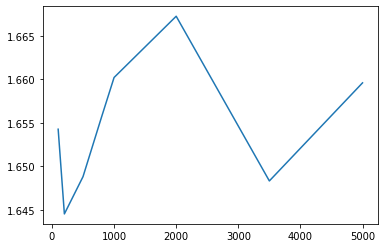

In [17]:
k = 2
n = 9
m = 100

# Vlist = []
# Qlist = []

I_ = np.block([[np.eye(k), np.zeros((k, n-k))],
                       [np.zeros((n-k, k)),-np.eye(n-k)]])
I = np.eye(n)

x2 = np.array([100,200,500,800,1000,2000,3500,5000])
y2 = np.zeros_like(x1,dtype=float)

for j in range(x2.shape[0]):
    z2 = np.zeros(1000, dtype = float)
    for i in tqdm(range(1000)):
        ds = Est_rev(k,n,x2[j])
        z2[i] = geodesicDistance(I, ds, k)
    y2[j] = np.mean(z2)
    
print(x2)
print(y2)
plt.plot(x2,y2)
plt.show()

# Sturm Algorithm

In [17]:
class Recursive_FM_Sturm:
    def __init__(self, dimension1, dimension2, Vlist, K, N, tol):
        self._k = dimension1
        self._n = dimension2
        self._Vlist = Vlist
        self._len = len(Vlist)
        self._ite = K
        self._N = N
        self._tolerence = tol
        
    def getTrans(self,k,n):
        A = np.eye(n)
        B = np.eye(n)
        for i in range(k):
            B[k+i,] = A[n-k+i,]
            B[n-k+i,] = A[k+i,]
        return B
    
    def csDecomp(self,S, k):
        u,cs,vdh = cossin(S, p = k, q = k, swap_sign = True)
        n = S.shape[0]
        T = self.getTrans(k,n)
        u = u@T
        cs = T@cs@T
        vdh = T@vdh
        return u,cs,vdh
        
    def geodesic(self,X,Y,t):
        U,CS,VDH = self.csDecomp(X.T.dot(Y), self._k)
        Theta = np.diag(np.arccos(np.diag(CS[:self._k,:self._k])))
        UU = U[:self._k, :self._k]
        VV = U[self._k:,self._k:]
        B = -2*UU@np.block([Theta, np.zeros((self._k, self._n - 2*self._k))])@VV.T
        Z = X@expm(t/2*np.block([[np.zeros((self._k,self._k)),-B],[B.T,np.zeros((self._n-self._k,self._n-self._k))]]))
        return Z
    
    def geodesicDistance(self,X,Y,k):
        u,cs,vdh = csDecomp(X.T.dot(Y),k)
        return np.linalg.norm(np.arccos(np.diag(cs[:k,:k])))
    
    def maxDistance(self, List, k):
        length = len(List)
        combs = comb(length,2)
        distances = np.zeros(int(combs))
        all_combs = list(list(combinations(range(length),2)))
        for j in range(int(combs)):
            distances[k] = self.geodesicDistance(List[all_combs[j][0]],List[all_combs[j][1]],k)
        return np.max(distances)
        
    def iFM(self):
        index = random.randint(0,self._len-1)
        mean = [None] * (self._N)
        mean[0] = self._Vlist[index]
        count = 0
        while True:
            if count > self._ite:
                if self.maxDistance(mean,self._k) < self._tolerence:
                    break
            mean[1:] = mean[:-1]
            mean[0] = self.geodesic(mean[0], self._Vlist[random.randint(0,self._len-1)], 1/(count+2))
            count += 1
        return mean[0]

## On Haar distribution

Sample generation function 

In [18]:
def Est_Sturm(k,n,m):
    Vlist = []
    for i in range(m):
        V0 = Haar(n)
        Vlist.append(V0)
    
    result = Recursive_FM_Sturm(k,n,Vlist,1e6,5,1e-5)
    return result.iFM()

Parameter Setup

In [19]:
k = 2
n = 9

I = np.eye(n)

Case 3 

x1 = np.array([100,200,500,800,1000,2000,3500,5000])
y1 = np.zeros_like(x1,dtype=float)

for j in range(x1.shape[0]):
    ds = Est_Sturm(k,n,x1[j])
    y1[j] = geodesicDistance(I, ds, k)
    
print(x1)
print(y1)
plt.plot(x1,y1)
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

[ 100  200  500  800 1000 2000 3500 5000]
[1.45490395 1.67373896 1.66719947 1.67840451 1.67811444 1.62288553
 1.65402812 1.64595969]


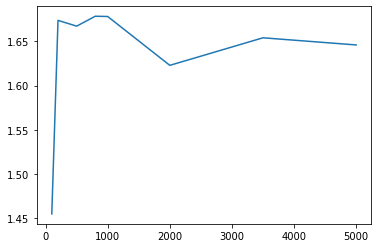

In [21]:
# With Replicates

x1 = np.array([100,200,500,800,1000,2000,3500,5000])
y1 = np.zeros_like(x1,dtype=float)

for j in range(x1.shape[0]):
    z1 = np.zeros(10, dtype = float)
    for i in tqdm(range(10)):
        ds = Est_Sturm(k,n,x1[j])
        z1[i] = geodesicDistance(I, ds, k)
    y1[j] = np.mean(z1)
    

print(x1)
print(y1)
plt.plot(x1,y1)
plt.show()

## On log-normal distribution

Samples generation function

In [20]:
def Est_Sturm_ln(k,n,m,mu,sigma):
    Vlist = []
    for i in range(m):
        V0 = log_normal(n, mu, sigma)
        Vlist.append(V0)
    
    result = Recursive_FM_Sturm(k,n,Vlist,1e6,5,1e-5)
    return result.iFM()

Parameter Setup

In [21]:
k = 2
n = 9
mu = np.eye(n)
sigma = 1.0

Case 3

[ 100  200  500  800 1000 2000 3500 5000]
[1.51020899 1.4966193  0.28517141 0.48958707 0.52595016 0.35751036
 0.73859382 0.83581338]


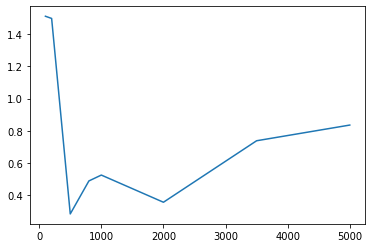

In [18]:
x1 = np.array([100,200,500,800,1000,2000,3500,5000])
y1 = np.zeros_like(x1,dtype=float)

for j in range(x1.shape[0]):
    ds = Est_Sturm_ln(k,n,x1[j],mu, sigma)
    y1[j] = geodesicDistance(I, ds, k)
    
print(x1)
print(y1)
plt.plot(x1,y1)
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

[ 100  200  500  800 1000 2000 3500 5000]
[1.05620355 0.91755593 0.97159968 0.70897545 0.78031519 0.52376019
 0.54509366 0.67698689]


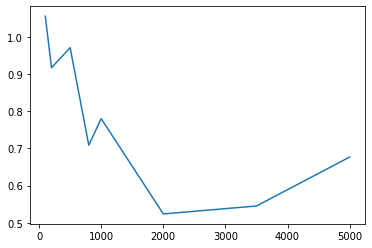

In [23]:
# With Replicates

x1 = np.array([100,200,500,800,1000,2000,3500,5000])
y1 = np.zeros_like(x1,dtype=float)

for j in range(x1.shape[0]):
    z1 = np.zeros(10, dtype = float)
    for i in tqdm(range(10)):
        ds = Est_Sturm_ln(k,n,x1[j],mu, sigma)
        z1[i] = geodesicDistance(I, ds, k)
    y1[j] = np.mean(z1)
    
print(x1)
print(y1)
plt.plot(x1,y1)
plt.show()

In [27]:
aa = Haar(9)
geodesicDista   nce(aa,I,3)

2.0925487021062166

## Replicate

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

[ 100  200  500  800 1000 2000 3500 5000]
[1.59757584 1.66477893 1.6795935  1.68515887 1.64535075 1.5003879
 1.68445915 1.68170003]


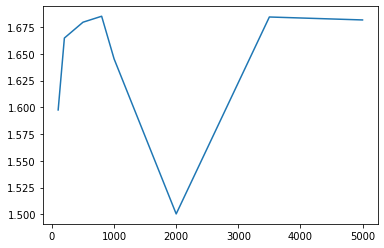

In [14]:
# With Replicates (Haar)

x1 = np.array([100,200,500,800,1000,2000,3500,5000])
y1 = np.zeros_like(x1,dtype=float)

for j in range(x1.shape[0]):
    z1 = np.zeros(10, dtype = float)
    for i in tqdm(range(10)):
        ds = Est_Sturm(k,n,x1[j])
        z1[i] = geodesicDistance(I, ds, k)
    y1[j] = np.mean(z1)
    

print(x1)
print(y1)
plt.plot(x1,y1)
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

[ 100  200  500  800 1000 2000 3500 5000]
[1.16342096 1.26454569 0.89289459 0.77799705 0.70844815 0.67076047
 0.66289726 0.65513459]


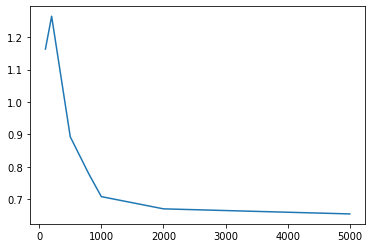

In [15]:
# With Replicates (log-normal)

x1 = np.array([100,200,500,800,1000,2000,3500,5000])
y1 = np.zeros_like(x1,dtype=float)

for j in range(x1.shape[0]):
    z1 = np.zeros(10, dtype = float)
    for i in tqdm(range(10)):
        ds = Est_Sturm_ln(k,n,x1[j],mu, sigma)
        z1[i] = geodesicDistance(I, ds, k)
    y1[j] = np.mean(z1)
    
print(x1)
print(y1)
plt.plot(x1,y1)
plt.show()

## Revised simulation on Haar distribution

In [22]:
def Est_Sturm_rev(k,n,m):
    Vlist = []
    for i in range(m):
        V0 = ortho_group.rvs(n)
        Vlist.append(V0)
    
    result = Recursive_FM_Sturm(k,n,Vlist,1e6,5,1e-5)
    return result.iFM()

In [23]:
k = 2
n = 9

I = np.eye(n)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

[ 100  200  500  800 1000 2000 3500 5000]
[1.62255634 1.58241418 1.69124515 1.68595595 1.67872001 1.6545783
 1.70093215 1.70556533]


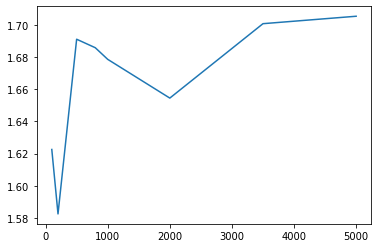

In [26]:
# With Replicates

x1 = np.array([100,200,500,800,1000,2000,3500,5000])
y1 = np.zeros_like(x1,dtype=float)

for j in range(x1.shape[0]):
    z1 = np.zeros(10, dtype = float)
    for i in tqdm(range(10)):
        ds = Est_Sturm_rev(k,n,x1[j])
        z1[i] = geodesicDistance(I, ds, k)
    y1[j] = np.mean(z1)
    

print(x1)
print(y1)       
plt.plot(x1,y1)
plt.show()